In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [2]:
Grid0121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_011121.csv')
Grid0221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020121.csv')
Grid0321 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_030121.csv')
Grid0421 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_040121.csv')
Grid0521 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_050121.csv')
Grid0621 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_060121.csv')
Grid0721 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_070121.csv')
Grid0821 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_080121.csv')
Grid0921 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_090121.csv')
Grid1021 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_100121.csv')
Grid1121 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_110121.csv')
Grid1221 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_120121.csv')
Grid0122 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_010122.csv')
Grid0222 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_020122.csv')

PV0121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_011121.csv')
PV0221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020121.csv')
PV0321 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_030121.csv')
PV0421 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_040121.csv')
PV0521 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_050121.csv')
PV0621 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_060121.csv')
PV0721 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_070121.csv')
PV0821 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_080121.csv')
PV0921 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_090121.csv')
PV1021 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_100121.csv')
PV1121 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_110121.csv')
PV1221 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_120121.csv')
PV0122 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_010122.csv')
PV0222 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_020122.csv')

In [3]:
def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    data_out['Timediff'] = data_out.diff()['Time']
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    data_out.drop([0], axis=0, inplace=True)
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data

In [4]:
Grid0121_hourly = extract_data(Grid0121)
Grid0221_hourly = extract_data(Grid0221)
Grid0321_hourly = extract_data(Grid0321)
Grid0421_hourly = extract_data(Grid0421)
Grid0521_hourly = extract_data(Grid0521)
Grid0621_hourly = extract_data(Grid0621)
Grid0721_hourly = extract_data(Grid0721)
Grid0821_hourly = extract_data(Grid0821)
Grid0921_hourly = extract_data(Grid0921)
Grid1021_hourly = extract_data(Grid1021)
Grid1121_hourly = extract_data(Grid1121)
Grid1221_hourly = extract_data(Grid1221)
Grid0122_hourly = extract_data(Grid0122)
Grid0222_hourly = extract_data(Grid0222)

PV0121_hourly = extract_data(PV0121)
PV0221_hourly = extract_data(PV0221)
PV0321_hourly = extract_data(PV0321)
PV0421_hourly = extract_data(PV0421)
PV0521_hourly = extract_data(PV0521)
PV0621_hourly = extract_data(PV0621)
PV0721_hourly = extract_data(PV0721)
PV0821_hourly = extract_data(PV0821)
PV0921_hourly = extract_data(PV0921)
PV1021_hourly = extract_data(PV1021)
PV1121_hourly = extract_data(PV1121)
PV1221_hourly = extract_data(PV1221)
PV0122_hourly = extract_data(PV0122)
PV0222_hourly = extract_data(PV0222)

In [5]:
Grid0121_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 07:00:00,-14812440.0,-4.114567
2020-12-02 08:00:00,-20756430.0,-5.765675
2020-12-02 09:00:00,-14546790.0,-4.040775
2020-12-02 10:00:00,-478860.0,-0.133017
2020-12-02 11:00:00,1555410.0,0.432058
...,...,...
2021-01-11 08:00:00,56160.0,0.015600
2021-01-11 09:00:00,871170.0,0.241992
2021-01-11 10:00:00,1094880.0,0.304133


In [6]:
PV0121_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,623340.0,0.173150
2020-12-02 10:00:00,1487100.0,0.413083
2020-12-02 11:00:00,1524450.0,0.423458
2020-12-02 12:00:00,1039440.0,0.288733
2020-12-02 13:00:00,668910.0,0.185808
...,...,...
2021-01-11 08:00:00,81960.0,0.022767
2021-01-11 09:00:00,843780.0,0.234383
2021-01-11 10:00:00,1061850.0,0.294958


In [7]:
Grid0121_hourly = Grid0121_hourly.iloc[2:,:]

In [8]:
Grid0221_hourly

,Energy,Energy_kWh
Time,,
2021-01-11 12:00:00,424290.0,0.117858
2021-01-11 13:00:00,1324410.0,0.367892
2021-01-11 14:00:00,1066530.0,0.296258
2021-01-11 15:00:00,215490.0,0.059858
2021-01-11 16:00:00,0.0,0.000000
...,...,...
2021-01-31 20:00:00,0.0,0.000000
2021-01-31 21:00:00,0.0,0.000000
2021-01-31 22:00:00,0.0,0.000000


In [9]:
PV0221_hourly 

,Energy,Energy_kWh
Time,,
2021-01-11 12:00:00,541590.0,0.150442
2021-01-11 13:00:00,1222290.0,0.339525
2021-01-11 14:00:00,1025670.0,0.284908
2021-01-11 15:00:00,213030.0,0.059175
2021-01-11 16:00:00,0.0,0.000000
...,...,...
2021-01-31 20:00:00,0.0,0.000000
2021-01-31 21:00:00,0.0,0.000000
2021-01-31 22:00:00,0.0,0.000000


In [10]:
Grid0321_hourly

,Energy,Energy_kWh
Time,,
2021-02-01 03:00:00,0.0,0.000000
2021-02-01 04:00:00,0.0,0.000000
2021-02-01 05:00:00,0.0,0.000000
2021-02-01 06:00:00,0.0,0.000000
2021-02-01 07:00:00,38550.0,0.010708
...,...,...
2021-02-28 21:00:00,0.0,0.000000
2021-02-28 22:00:00,0.0,0.000000
2021-02-28 23:00:00,0.0,0.000000


In [11]:
PV0321_hourly

,Energy,Energy_kWh
Time,,
2021-02-01 03:00:00,0.0,0.000000
2021-02-01 04:00:00,0.0,0.000000
2021-02-01 05:00:00,0.0,0.000000
2021-02-01 06:00:00,0.0,0.000000
2021-02-01 07:00:00,38730.0,0.010758
...,...,...
2021-02-28 20:00:00,0.0,0.000000
2021-02-28 21:00:00,0.0,0.000000
2021-02-28 22:00:00,0.0,0.000000


In [12]:
Grid0321_hourly = Grid0321_hourly.iloc[:670,:]

In [13]:
Grid0421_hourly

,Energy,Energy_kWh
Time,,
2021-03-01 03:00:00,0.0,0.000000
2021-03-01 04:00:00,0.0,0.000000
2021-03-01 05:00:00,0.0,0.000000
2021-03-01 06:00:00,24510.0,0.006808
2021-03-01 07:00:00,1254720.0,0.348533
...,...,...
2021-03-31 19:00:00,0.0,0.000000
2021-03-31 20:00:00,0.0,0.000000
2021-03-31 21:00:00,0.0,0.000000


In [14]:
PV0421_hourly

,Energy,Energy_kWh
Time,,
2021-03-01 03:00:00,0.0,0.000000
2021-03-01 04:00:00,0.0,0.000000
2021-03-01 05:00:00,0.0,0.000000
2021-03-01 06:00:00,15030.0,0.004175
2021-03-01 07:00:00,1185420.0,0.329283
...,...,...
2021-03-31 19:00:00,0.0,0.000000
2021-03-31 20:00:00,0.0,0.000000
2021-03-31 21:00:00,0.0,0.000000


In [15]:
Grid0521_hourly

,Energy,Energy_kWh
Time,,
2021-04-05 02:00:00,0.0,0.000000
2021-04-05 03:00:00,0.0,0.000000
2021-04-05 04:00:00,0.0,0.000000
2021-04-05 05:00:00,71340.0,0.019817
2021-04-05 06:00:00,3230340.0,0.897317
...,...,...
2021-04-30 19:00:00,0.0,0.000000
2021-04-30 20:00:00,0.0,0.000000
2021-04-30 21:00:00,0.0,0.000000


In [16]:
PV0521_hourly

,Energy,Energy_kWh
Time,,
2021-04-05 02:00:00,0.0,0.000000
2021-04-05 03:00:00,0.0,0.000000
2021-04-05 04:00:00,0.0,0.000000
2021-04-05 05:00:00,76650.0,0.021292
2021-04-05 06:00:00,3624060.0,1.006683
...,...,...
2021-04-30 20:00:00,0.0,0.000000
2021-04-30 21:00:00,0.0,0.000000
2021-04-30 22:00:00,0.0,0.000000


In [17]:
PV0521_hourly = PV0521_hourly.iloc[:622,:]

In [18]:
Grid0621_hourly

,Energy,Energy_kWh
Time,,
2021-05-03 02:00:00,0.0,0.000000
2021-05-03 03:00:00,0.0,0.000000
2021-05-03 04:00:00,1681290.0,0.467025
2021-05-03 05:00:00,14509080.0,4.030300
2021-05-03 06:00:00,0.0,0.000000
...,...,...
2021-05-31 19:00:00,307860.0,0.085517
2021-05-31 20:00:00,0.0,0.000000
2021-05-31 21:00:00,0.0,0.000000


In [19]:
PV0621_hourly

,Energy,Energy_kWh
Time,,
2021-05-03 02:00:00,0.0,0.000000
2021-05-03 03:00:00,0.0,0.000000
2021-05-03 04:00:00,1691550.0,0.469875
2021-05-03 05:00:00,23495010.0,6.526392
2021-05-03 06:00:00,0.0,0.000000
...,...,...
2021-05-31 20:00:00,0.0,0.000000
2021-05-31 21:00:00,0.0,0.000000
2021-05-31 22:00:00,0.0,0.000000


In [20]:
PV0621_hourly = PV0621_hourly.iloc[:694,:]

In [21]:
Grid0721_hourly

,Energy,Energy_kWh
Time,,
2021-06-01 00:00:00,0.0,0.000000
2021-06-01 01:00:00,0.0,0.000000
2021-06-01 02:00:00,0.0,0.000000
2021-06-01 03:00:00,274860.0,0.076350
2021-06-01 04:00:00,2353950.0,0.653875
...,...,...
2021-06-30 19:00:00,65100.0,0.018083
2021-06-30 20:00:00,0.0,0.000000
2021-06-30 21:00:00,0.0,0.000000


In [22]:
PV0721_hourly

,Energy,Energy_kWh
Time,,
2021-06-01 00:00:00,0.0,0.000000
2021-06-01 01:00:00,0.0,0.000000
2021-06-01 02:00:00,0.0,0.000000
2021-06-01 03:00:00,290430.0,0.080675
2021-06-01 04:00:00,2256840.0,0.626900
...,...,...
2021-06-30 19:00:00,78300.0,0.021750
2021-06-30 20:00:00,0.0,0.000000
2021-06-30 21:00:00,0.0,0.000000


In [23]:
Grid0821_hourly

,Energy,Energy_kWh
Time,,
2021-07-01 00:00:00,0.0,0.000000
2021-07-01 01:00:00,0.0,0.000000
2021-07-01 02:00:00,0.0,0.000000
2021-07-01 03:00:00,46680.0,0.012967
2021-07-01 04:00:00,112620.0,0.031283
...,...,...
2021-07-31 19:00:00,141570.0,0.039325
2021-07-31 20:00:00,0.0,0.000000
2021-07-31 21:00:00,0.0,0.000000


In [24]:
PV0821_hourly

,Energy,Energy_kWh
Time,,
2021-07-01 00:00:00,0.0,0.000000
2021-07-01 01:00:00,0.0,0.000000
2021-07-01 02:00:00,0.0,0.000000
2021-07-01 03:00:00,15630.0,0.004342
2021-07-01 04:00:00,128850.0,0.035792
...,...,...
2021-07-31 19:00:00,124290.0,0.034525
2021-07-31 20:00:00,0.0,0.000000
2021-07-31 21:00:00,0.0,0.000000


In [25]:
Grid0921_hourly

,Energy,Energy_kWh
Time,,
2021-08-01 04:00:00,570960.0,0.158600
2021-08-01 05:00:00,3828480.0,1.063467
2021-08-01 06:00:00,7057410.0,1.960392
2021-08-01 07:00:00,7494750.0,2.081875
2021-08-01 08:00:00,9241290.0,2.567025
...,...,...
2021-08-31 20:00:00,0.0,0.000000
2021-08-31 21:00:00,0.0,0.000000
2021-08-31 22:00:00,0.0,0.000000


In [26]:
PV0921_hourly

,Energy,Energy_kWh
Time,,
2021-08-01 04:00:00,600930.0,0.166925
2021-08-01 05:00:00,3764130.0,1.045592
2021-08-01 06:00:00,7306110.0,2.029475
2021-08-01 07:00:00,6745500.0,1.873750
2021-08-01 08:00:00,9265140.0,2.573650
...,...,...
2021-08-31 20:00:00,0.0,0.000000
2021-08-31 21:00:00,0.0,0.000000
2021-08-31 22:00:00,0.0,0.000000


In [27]:
Grid1021_hourly

,Energy,Energy_kWh
Time,,
2021-09-01 04:00:00,0.0,0.000000
2021-09-01 05:00:00,459990.0,0.127775
2021-09-01 06:00:00,1131930.0,0.314425
2021-09-01 07:00:00,-12176280.0,-3.382300
2021-09-01 08:00:00,1277940.0,0.354983
...,...,...
2021-09-30 19:00:00,0.0,0.000000
2021-09-30 20:00:00,0.0,0.000000
2021-09-30 21:00:00,0.0,0.000000


In [28]:
PV1021_hourly

,Energy,Energy_kWh
Time,,
2021-09-01 04:00:00,0.0,0.000000
2021-09-01 05:00:00,536370.0,0.148992
2021-09-01 06:00:00,3293160.0,0.914767
2021-09-01 07:00:00,8457600.0,2.349333
2021-09-01 08:00:00,12863610.0,3.573225
...,...,...
2021-09-30 19:00:00,0.0,0.000000
2021-09-30 20:00:00,0.0,0.000000
2021-09-30 21:00:00,0.0,0.000000


In [29]:
Grid1121_hourly

,Energy,Energy_kWh
Time,,
2021-10-01 04:00:00,0.0,0.000000
2021-10-01 05:00:00,38370.0,0.010658
2021-10-01 06:00:00,-23789040.0,-6.608067
2021-10-01 07:00:00,-59033340.0,-16.398150
2021-10-01 08:00:00,-35422920.0,-9.839700
...,...,...
2021-10-31 20:00:00,0.0,0.000000
2021-10-31 21:00:00,0.0,0.000000
2021-10-31 22:00:00,0.0,0.000000


In [30]:
PV1121_hourly

,Energy,Energy_kWh
Time,,
2021-10-01 04:00:00,0.0,0.000000
2021-10-01 05:00:00,48420.0,0.013450
2021-10-01 06:00:00,5620440.0,1.561233
2021-10-01 07:00:00,15887310.0,4.413142
2021-10-01 08:00:00,15052050.0,4.181125
...,...,...
2021-10-31 21:00:00,0.0,0.000000
2021-10-31 22:00:00,0.0,0.000000
2021-10-31 23:00:00,0.0,0.000000


In [31]:
PV1121_hourly = PV1121_hourly.iloc[:741,:]

In [32]:
Grid1221_hourly

,Energy,Energy_kWh
Time,,
2021-11-01 05:00:00,0.0,0.000000
2021-11-01 06:00:00,-3579300.0,-0.994250
2021-11-01 07:00:00,-46496310.0,-12.915642
2021-11-01 08:00:00,-46311120.0,-12.864200
2021-11-01 09:00:00,-26532540.0,-7.370150
...,...,...
2021-11-30 20:00:00,0.0,0.000000
2021-11-30 21:00:00,0.0,0.000000
2021-11-30 22:00:00,0.0,0.000000


In [33]:
PV1221_hourly

,Energy,Energy_kWh
Time,,
2021-11-01 05:00:00,0.0,0.000000
2021-11-01 06:00:00,497580.0,0.138217
2021-11-01 07:00:00,8361660.0,2.322683
2021-11-01 08:00:00,33784440.0,9.384567
2021-11-01 09:00:00,27234270.0,7.565075
...,...,...
2021-11-30 20:00:00,0.0,0.000000
2021-11-30 21:00:00,0.0,0.000000
2021-11-30 22:00:00,0.0,0.000000


In [34]:
Grid0122_hourly

,Energy,Energy_kWh
Time,,
2021-12-01 17:00:00,-11602200.0,-3.222833
2021-12-01 18:00:00,-39142800.0,-10.873000
2021-12-01 19:00:00,-34525770.0,-9.590492
2021-12-01 20:00:00,0.0,0.000000
2021-12-01 21:00:00,0.0,0.000000
...,...,...
2021-12-31 20:00:00,0.0,0.000000
2021-12-31 21:00:00,0.0,0.000000
2021-12-31 22:00:00,0.0,0.000000


In [35]:
PV0122_hourly

,Energy,Energy_kWh
Time,,
2021-12-01 17:00:00,0.0,0.0
2021-12-01 18:00:00,0.0,0.0
2021-12-01 19:00:00,0.0,0.0
2021-12-01 20:00:00,0.0,0.0
2021-12-01 21:00:00,0.0,0.0
...,...,...
2021-12-31 21:00:00,0.0,0.0
2021-12-31 22:00:00,0.0,0.0
2021-12-31 23:00:00,0.0,0.0


In [36]:
PV0122_hourly = PV0122_hourly.iloc[:728,:]

In [37]:
Grid0222_hourly

,Energy,Energy_kWh
Time,,
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0
2022-01-01 05:00:00,0.0,0.0
...,...,...
2022-01-31 21:00:00,0.0,0.0
2022-01-31 22:00:00,0.0,0.0
2022-01-31 23:00:00,0.0,0.0


In [38]:
PV0222_hourly

,Energy,Energy_kWh
Time,,
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0
2022-01-01 05:00:00,0.0,0.0
...,...,...
2022-01-31 21:00:00,0.0,0.0
2022-01-31 22:00:00,0.0,0.0
2022-01-31 23:00:00,0.0,0.0


In [39]:
print(len(Grid0121_hourly) == len(PV0121_hourly))
print(len(Grid0221_hourly) == len(PV0221_hourly))
print(len(Grid0321_hourly) == len(PV0321_hourly))
print(len(Grid0421_hourly) == len(PV0421_hourly))
print(len(Grid0521_hourly) == len(PV0521_hourly))
print(len(Grid0621_hourly) == len(PV0621_hourly))
print(len(Grid0721_hourly) == len(PV0721_hourly))
print(len(Grid0821_hourly) == len(PV0821_hourly))
print(len(Grid0921_hourly) == len(PV0921_hourly))
print(len(Grid1021_hourly) == len(PV1021_hourly))
print(len(Grid1121_hourly) == len(PV1121_hourly))
print(len(Grid1221_hourly) == len(PV1221_hourly))
print(len(Grid0122_hourly) == len(PV0122_hourly))
print(len(Grid0222_hourly) == len(PV0222_hourly))

True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [49]:
Grid_hourly = pd.concat([Grid0121_hourly, Grid0221_hourly, Grid0321_hourly, Grid0421_hourly, Grid0521_hourly, Grid0621_hourly, Grid0721_hourly, Grid0821_hourly, Grid0921_hourly, Grid1021_hourly, Grid1121_hourly, Grid1221_hourly, Grid0122_hourly, Grid0222_hourly])
PV_hourly = pd.concat([PV0121_hourly, PV0221_hourly, PV0321_hourly, PV0421_hourly, PV0521_hourly, PV0621_hourly, PV0721_hourly, PV0821_hourly, PV0921_hourly, PV1021_hourly, PV1121_hourly, PV1221_hourly, PV0122_hourly, PV0222_hourly])

In [50]:
Grid_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,-14546790.0,-4.040775
2020-12-02 10:00:00,-478860.0,-0.133017
2020-12-02 11:00:00,1555410.0,0.432058
2020-12-02 12:00:00,1070040.0,0.297233
2020-12-02 13:00:00,647430.0,0.179842
...,...,...
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000
2022-01-31 23:00:00,0.0,0.000000


In [51]:
PV_hourly

,Energy,Energy_kWh
Time,,
2020-12-02 09:00:00,623340.0,0.173150
2020-12-02 10:00:00,1487100.0,0.413083
2020-12-02 11:00:00,1524450.0,0.423458
2020-12-02 12:00:00,1039440.0,0.288733
2020-12-02 13:00:00,668910.0,0.185808
...,...,...
2022-01-31 21:00:00,0.0,0.000000
2022-01-31 22:00:00,0.0,0.000000
2022-01-31 23:00:00,0.0,0.000000


In [52]:
def markNaN(in_val):
    if (in_val < -10) or (in_val > 40):
        return np.NaN
    return in_val

def fixData(data_in):
    data_out = data_in
    
    data_out['Energy_kWh'] = data_in['Energy_kWh'].map(markNaN).copy()
    
    data_out = data_out.fillna(method='ffill')
    return data_out

In [53]:
#Grid_hourly = fixData(Grid_hourly)
#PV_hourly = fixData(PV_hourly)

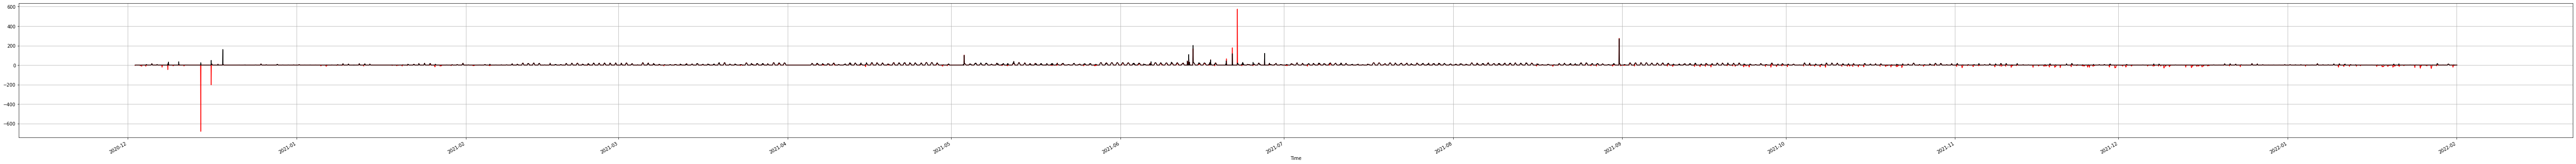

In [54]:
#fig1 = Grid_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='r')
fig1 = Grid_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())
#fig2 = PV_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(100,6), color='k')
fig2 = PV_hourly['Energy_kWh'].plot(figsize=(100,6), color='k')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [55]:
Charge_hourly = Grid_hourly[['Energy_kWh']].copy()
Charge_hourly['Energy_kWh'] = PV_hourly['Energy_kWh'] - Grid_hourly['Energy_kWh']

In [58]:
Charge_hourly = fixData(Charge_hourly)

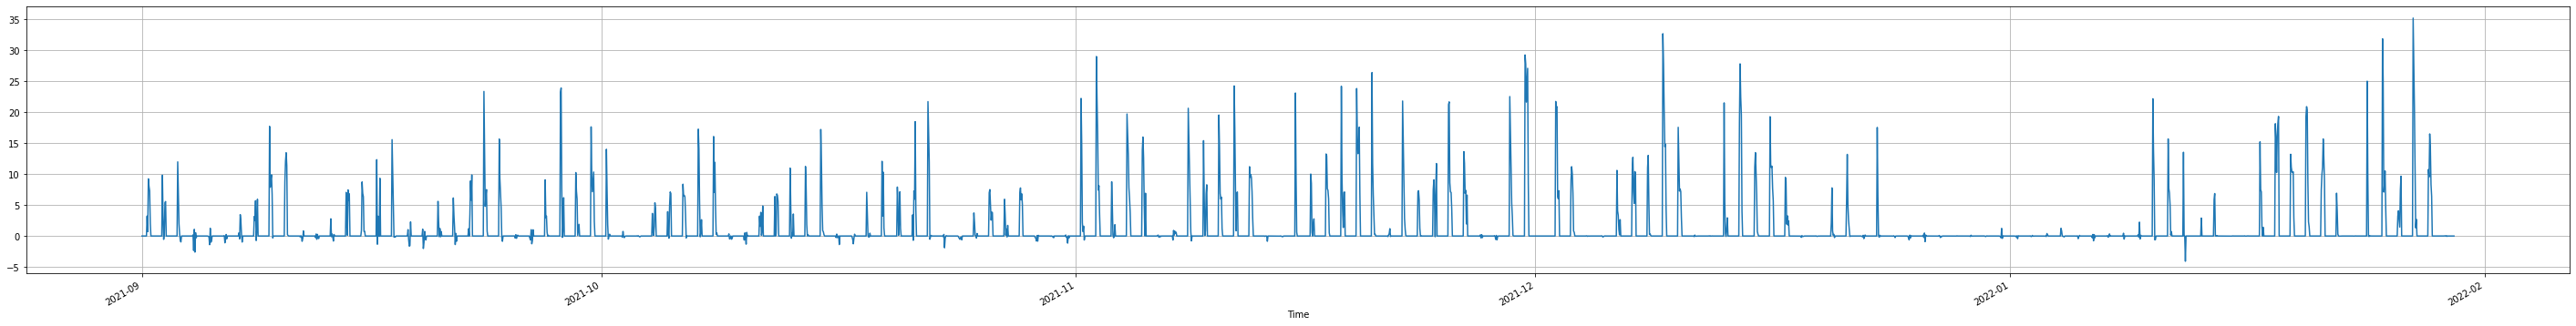

In [67]:
fig = Charge_hourly.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

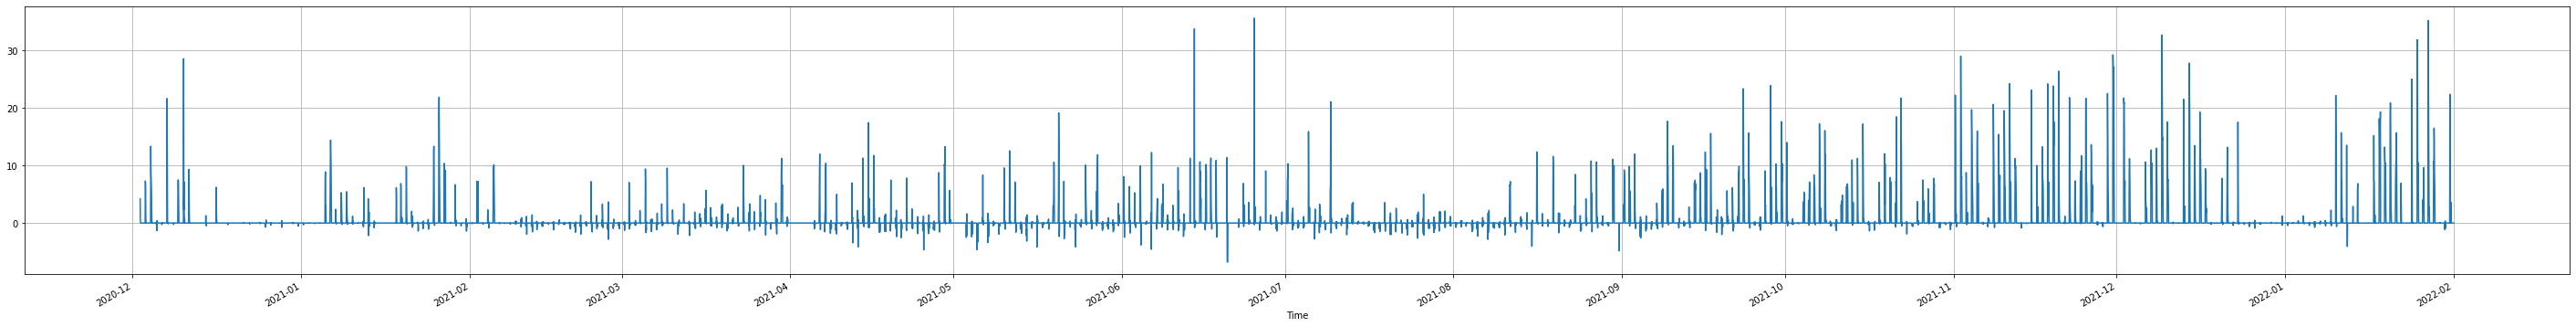

In [66]:
fig = Charge_hourly['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

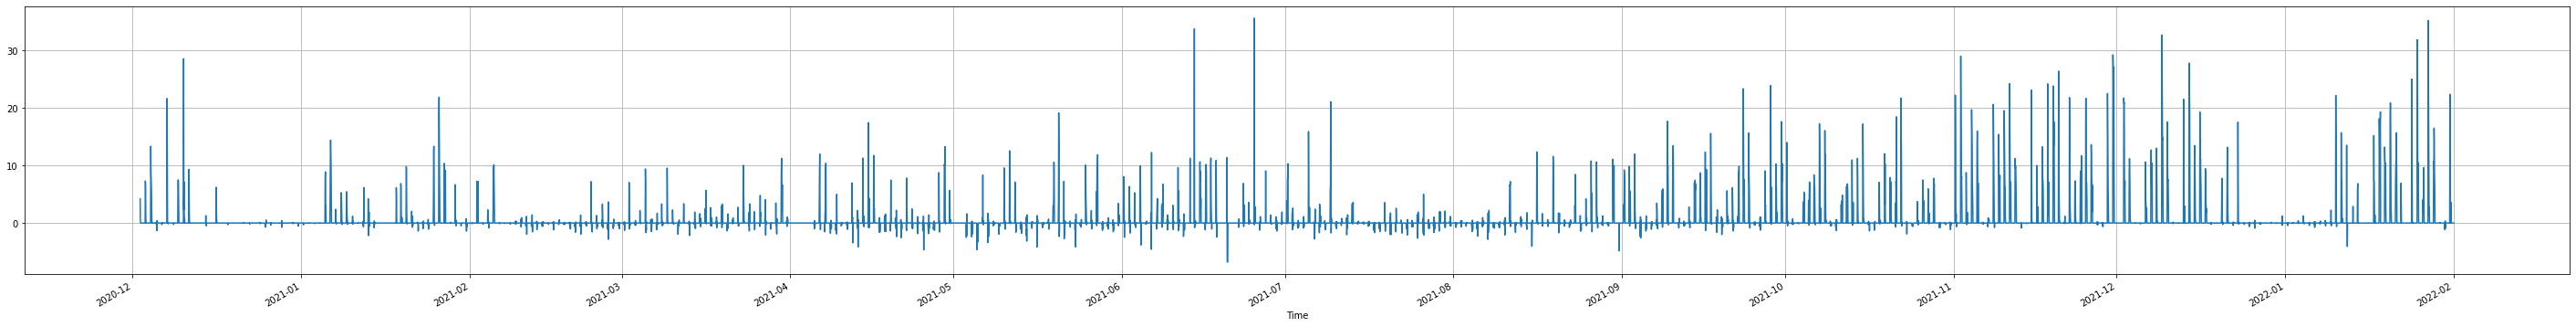

In [64]:
focus = Charge_hourly
focus['Energy_kWh'] = np.where((Charge_hourly.index.hour > 7) & (Charge_hourly.index.hour<14), Charge_hourly['Energy_kWh'], 0)
fig = focus['Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

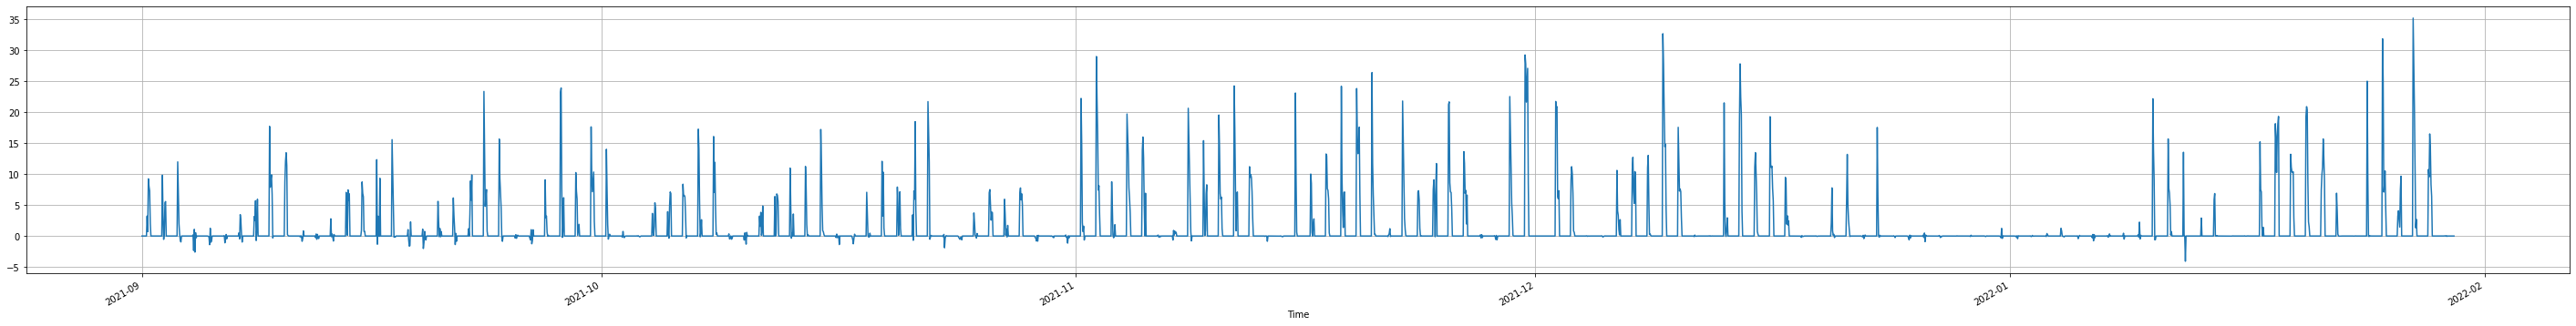

In [71]:
fig = focus.loc['2021-09-01 00:00:00':'2022-01-30 00:00:00','Energy_kWh'].plot(figsize=(50,6))
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

In [81]:
Charge_daily = Charge_hourly[['Energy_kWh']].groupby(pd.Grouper(freq='1D')).sum()

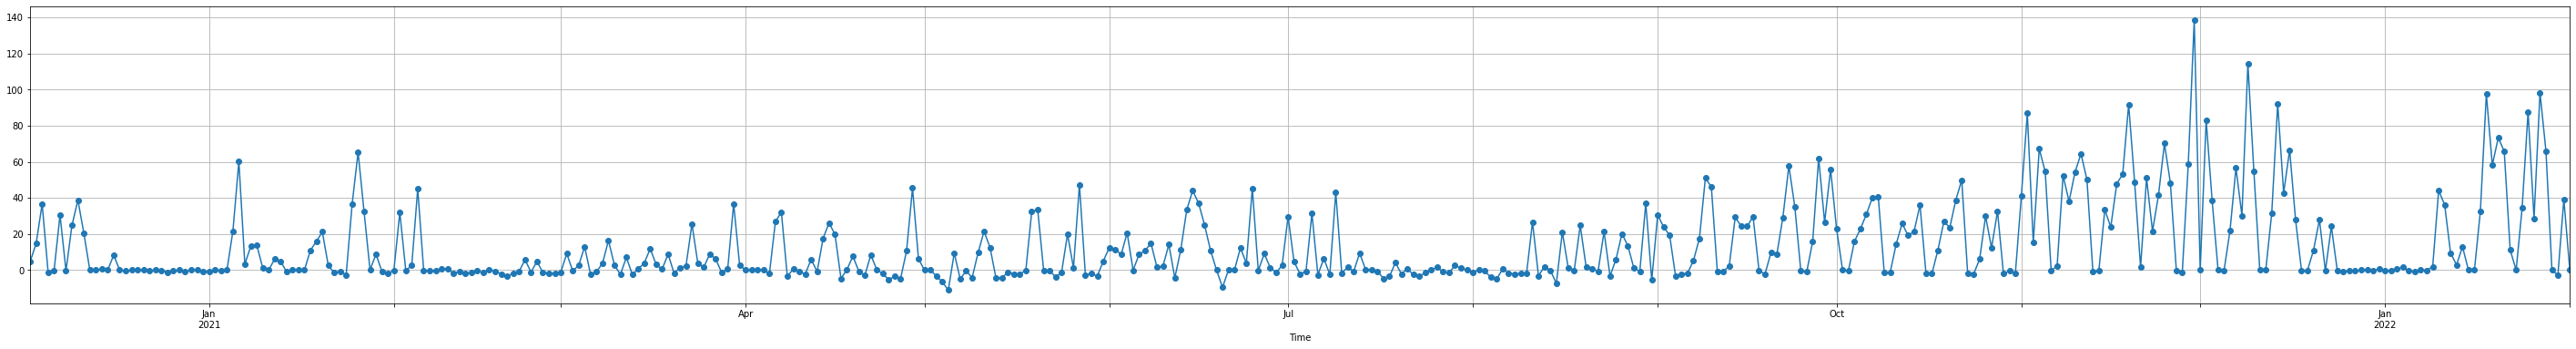

In [82]:
fig = Charge_daily['Energy_kWh'].plot(figsize=(50,6), marker='o')
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()

The total charging demand is highest on Tuesday and Thursday, while the demand on a day is highest in early morning.

=> build a model based on this pattern

In [83]:
Charge_4hour = Charge_hourly[['Energy_kWh']].groupby(pd.Grouper(freq='4H')).sum()

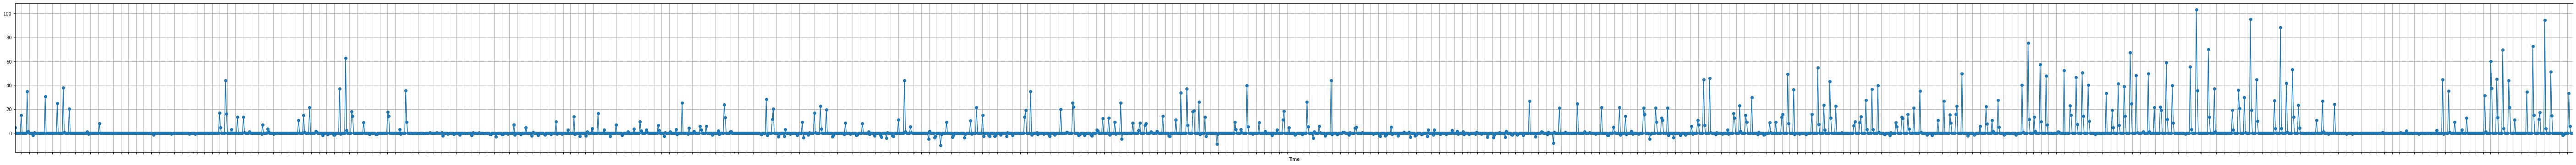

In [85]:
fig = Charge_4hour['Energy_kWh'].plot(figsize=(100,6), marker='o')
fig.xaxis.set_major_locator(plt.dates.MonthLocator())
plt.pyplot.grid()
plt.pylab.show()